# Récurrent Neutral Network (RNN)

## Description des Réseaux de neurones récurrents

Les RNN sont une classe de résseaux de neurone qui permettent d'utiliser des outputs comme inputs tout en ayant des couches cachées.

![Schéma d'un RNN](Images\Architecture_RNN.png)

La raison principale des RNN est leur capacité d'opération sur des séquences de vecteurs.

![Schéma d'un RNN](Images\Architecture_RNN_and_utilisation.png)

|Avantages                                          |Drawbacks                                           |
| --------------------------------------------------- | ---------------------------------------------------- |
| Peut prendre en entrée des inputs de tailles quelconques | Le temps de calcul est élevé                          |
| La taille du modèle ne croît pas avec la taille des inputs | Ne peut pas prendre en inputs des futurs états       |
| Les informations issues de l'historique sont prises en compte | L'information historique se perd au fil du temps de la simulation |
| Les poids sont conservés au cours du temps.           | 


## Développement manuelle d'un réseau de neurone récurrent

In [1]:
#Import package
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 

from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [4]:
# Définie la classe RNN
class RNN(nn.Module):
    # implement RNN from scratch rather than using nn.RNN
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)
        
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)


Exemple pour un unique symbole

In [5]:
load_data()

({'Arabic': ['Khoury',
   'Nahas',
   'Daher',
   'Gerges',
   'Nazari',
   'Maalouf',
   'Gerges',
   'Naifeh',
   'Guirguis',
   'Baba',
   'Sabbagh',
   'Attia',
   'Tahan',
   'Haddad',
   'Aswad',
   'Najjar',
   'Dagher',
   'Maloof',
   'Isa',
   'Asghar',
   'Nader',
   'Gaber',
   'Abboud',
   'Maalouf',
   'Zogby',
   'Srour',
   'Bahar',
   'Mustafa',
   'Hanania',
   'Daher',
   'Tuma',
   'Nahas',
   'Saliba',
   'Shamoon',
   'Handal',
   'Baba',
   'Amari',
   'Bahar',
   'Atiyeh',
   'Said',
   'Khouri',
   'Tahan',
   'Baba',
   'Mustafa',
   'Guirguis',
   'Sleiman',
   'Seif',
   'Dagher',
   'Bahar',
   'Gaber',
   'Harb',
   'Seif',
   'Asker',
   'Nader',
   'Antar',
   'Awad',
   'Srour',
   'Shadid',
   'Hajjar',
   'Hanania',
   'Kalb',
   'Shadid',
   'Bazzi',
   'Mustafa',
   'Masih',
   'Ghanem',
   'Haddad',
   'Isa',
   'Antoun',
   'Sarraf',
   'Sleiman',
   'Dagher',
   'Najjar',
   'Malouf',
   'Nahas',
   'Naser',
   'Saliba',
   'Shamon',
   'Malouf',

In [6]:
        
category_lines, all_categories = load_data()
n_categories = len(all_categories)

n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

# one step
input_tensor = letter_to_tensor('A') # One hot-Encoder
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor, hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


Exemple pour un ensemble de symbole

In [20]:
# whole sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor[0], hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [21]:
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

print(category_from_output(output))

Irish


In [22]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()


### Etape d'entrainement

5000 5.0 2.4022 Zientek / Czech WRONG (Polish)
10000 10.0 2.5873 Castell / Dutch WRONG (Spanish)
15000 15.0 4.8711 Jura / Korean WRONG (Russian)
20000 20.0 0.4851 Bahar / Arabic CORRECT
25000 25.0 1.1627 Kanaan / Irish WRONG (Arabic)
30000 30.0 1.0124 Xuan / Chinese CORRECT
35000 35.0 1.1781 Cao / Chinese WRONG (Vietnamese)
40000 40.0 0.4198 Koo / Korean CORRECT
45000 45.0 1.7817 Morales / Portuguese WRONG (Spanish)
50000 50.0 0.5507 Zharov / Russian CORRECT
55000 55.00000000000001 0.4559 Cheng / Chinese CORRECT
60000 60.0 0.7133 Rossi / Italian CORRECT
65000 65.0 3.2917 Kaglantge / French WRONG (Greek)
70000 70.0 1.3963 Moon / Korean CORRECT
75000 75.0 1.6800 Lieu / Vietnamese CORRECT
80000 80.0 0.3940 Hwang / Korean CORRECT
85000 85.0 3.2176 Thomas / Greek WRONG (French)
90000 90.0 2.8475 Hardy / Irish WRONG (French)
95000 95.0 0.6883 Capello / Spanish CORRECT
100000 100.0 3.5183 Kennedy / English WRONG (Irish)


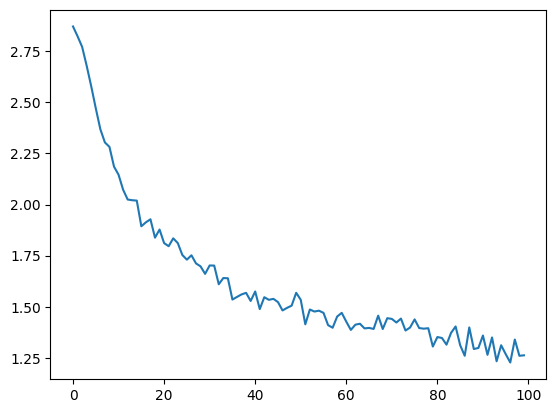

In [23]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")
        
    
plt.figure()
plt.plot(all_losses)
plt.show()

### Prédiction

In [ ]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        
        hidden = rnn.init_hidden()
    
        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)
        
        guess = category_from_output(output)
        print(guess)


while True:
    sentence = input("Input:")
    if sentence == "quit":
        break
    
    predict(sentence)

### Développement d'un réseau de neurone récurrent avec PyTorch

In [9]:
input_size = 28
hidden_size = n_hidden
sequence_length = 28
num_layers = 2
num_classes = n_categories

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Selectionne l'appareil qui support le 


#RNN many to one
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.num_layer = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        #Input must have the shape : (batch, seq, input_size)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, value):
        h0 = torch.zeros(self.num_layers, value.size(0), self.hidden_size).to(device)
        #c0 = torch.zeros(self.num_layers, value.size(0), self.hidden_size).to(device) # second initial vector has to be initialited for LSTM

        out, _ = self.rnn(value, h0) # gru \ LSTM (long-short term memory) self.lstm(value, (h0,c0)
        # output : batch_size, seq_size, hidden_size
        out = out[:, -1, :]
        out = self.fc(out)

model = RNN(input_size, hidden_size, num_layers, num_classes)

Le reste, entrainement et test, est identique.